## cDC ATAC analysis - UMAP, DAR, genomic regions + coembedding plots - Figure 5A-D, Ext F5C
Figure 5A, B, C, D, Extended Data Figure 5C

- Author: CW, see DF notebook for full joint RNA+ATAC analysis
- files needed: 8_ATAC_cDC_cells.rds, 9_coembed_cDC_cells.rds, cDC_ATAC_analysis/F5C_mDC_vs_cDC1_DARs_pval1e_2.csv, F5C_mDC_vs_cDC2_DARs_pval1e_2.csv, F5C_mDC_vs_allcDC_DARs.csv
- last updated: 04/12/24

In [1]:
library(ggplot2)
library(Seurat)
library(Signac)
library(dplyr)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Signac built for for SeuratObject v4 was just loaded with SeuratObject
v5; disabling v5 assays and validation routines, and ensuring assays
work in strict v3/v4 compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Load objects

In [23]:
obj.ATAC <- readRDS('/path_to_file/8_ATAC_cDC_cells.rds')

In [3]:
obj.coembed <- readRDS('/path_to_file/9_coembed_cDC_cells.rds')

In [4]:
obj.ATAC
obj.coembed

An object of class Seurat 
876943 features across 235 samples within 3 assays 
Active assay: gene.activities (19607 features, 18145 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: peaks, peaks_ChromatinAssay
 7 dimensional reductions calculated: lsi, harmony, umap, featureumap, globalumap, pca, DEGumap

An object of class Seurat 
934783 features across 2395 samples within 6 assays 
Active assay: RNA (28295 features, 0 variable features)
 3 layers present: counts, data, scale.data
 5 other assays present: SCT, integrated, peaks, gene.activities, peaks_ChromatinAssay
 3 dimensional reductions calculated: pca, harmony, umap

## intersected markers between mDC vs all DARs and mDC vs all DEGs - see notebook by DF for analysis

In [5]:
intersected_markers <- c( 'IL15', 'FSCN1', 'DUSP22', 'KDM2B', 'GLS', 'CCR7')

## cDC comebeded UMAP - Figure 5B
see DF notebook for cDC ATAC coembedding

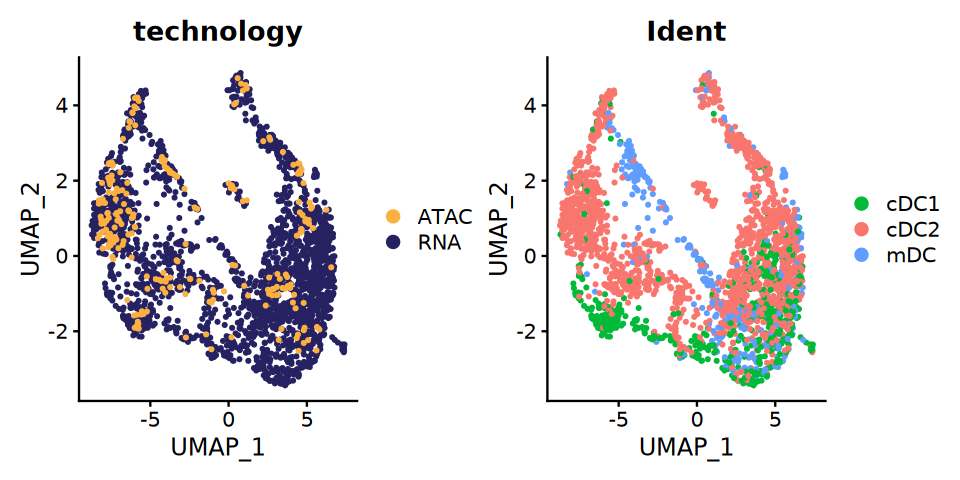

In [6]:
options(repr.plot.height = 4, repr.plot.width = 8)
p1 <- DimPlot(obj.coembed, group.by = "technology", reduction = "umap", 
        cols = c('#FBB040', '#262262'))

p2 <- DimPlot(obj.coembed, group.by = "Ident", reduction = "umap", 
        cols = c('#00BA38', '#F8766D','#619CFF'))
p1+p2
#ggsave('/F5B_integrated_ATAC_RNA_cDC.pdf', height = 3.5, width = 8


## Differentially Accessible Peaks
mDC vs cDC1 
mDC vs cDC2
mDC vs both - used to find intersected DEGs for genomic tracks 

Use normalized peaks (peaks assay) to compute, then chromatin assay to find closest features

#### FUNCTIONS

In [9]:
find_peaks <- function(ident2 = NULL) {
   DefaultAssay(obj.ATAC) <- 'peaks'
    
    da_peaks<- FindMarkers(object = obj.ATAC,
                               ident.1 = "mDC",
                               ident.2 = ident2,
                               test.use = 'LR',
                               logfc.threshold = 0.01, 
                               min.pct = 0.05,
                               latent.vars = 'peak_region_fragments')
    return(da_peaks)
}

In [1]:
make_volcano_df <- function(result,lf_cutoff, padj_cutoff){
    #select log fc and p value from result to visualize
    #col_names: c('log fold change', 'p-value') - may be named differently
    #lf_cutoff: cutoff for de genes
    #padj_cutoff: de genes are < padj_cutoff
    
    volcano_df <- result[,c('avg_log2FC', 'p_val', 'p_val_adj')]
    
    volcano_df <- volcano_df %>% arrange(p_val)
    
    #get the gene name (probably the rowname of result)
    volcano_df$gene_symbol <- result$gene_symbol
    
    volcano_df$diffexpressed = 'NO'
    
    #diff expressed with up and down 
    volcano_df[volcano_df$avg_log2FC > lf_cutoff & volcano_df$p_val < padj_cutoff,]$diffexpressed <- 'UP'
    
    if(dim(volcano_df[volcano_df$avg_log2FC < -lf_cutoff & volcano_df$p_val < padj_cutoff,])[1] > 0) {
        volcano_df[volcano_df$avg_log2FC < -lf_cutoff & volcano_df$p_val < padj_cutoff,]$diffexpressed <- 'DOWN'
        }
    
    volcano_df$p_val <- volcano_df$p_val + 1e-319
    
    #add gene symbols to only the top 20 genes on each side
    volcano_df$delabel <- NA 
    volcano_df[volcano_df$diffexpressed == 'UP',][1:30,]$delabel <- volcano_df[volcano_df$diffexpressed == 'UP',][1:30,]$gene_symbol
    
    if("DOWN" %in% unique(volcano_df$diffexpressed)) {
        volcano_df[volcano_df$diffexpressed == 'DOWN',][1:30,]$delabel <- volcano_df[volcano_df$diffexpressed == 'DOWN',][1:30,]$gene_symbol
    }
    
    return(volcano_df)
}

### 1. mDC versus cDC1

#### a. find peaks

In [10]:
mDC.cDC1.peaks <- find_peaks('cDC1')
#mDC.cDC1.peaks.chromatinassay <- find_peaks('cDC1')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [ ]:
#add closest genes to peak regions 
mDC.cDC1.peaknames <- ClosestFeature(obj.ATAC, regions = rownames(mDC.cDC1.peaks), sep = c(":", "-"))
annotated.mDC.cDC1.peaks <- mDC.cDC1.peaks[rownames(mDC.cDC1.peaks) %in% mDC.cDC1.peaknames$query_region,]

annotated.mDC.cDC1.peaks$gene_symbol <- NA
annotated.mDC.cDC1.peaks$gene_symbol = mDC.cDC1.peaknames$gene_name

#### b. generate dataframes for volcano plots

In [12]:
#generate filtered table of peaks, label those with p-val < 0.01 
volcano_df_cDC1 <- make_volcano_df(annotated.mDC.cDC1.peaks, 0, 1e-2) # adjusted p value < 0.01

#add the intersected markers in green
volcano_df_cDC1[volcano_df_cDC1$gene_symbol %in% intersected_markers & 
                volcano_df_cDC1$p_val < 1e-2,]$diffexpressed <- 'intersect'

volcano_df_cDC1[volcano_df_cDC1$gene_symbol %in% intersected_markers & 
                volcano_df_cDC1$p_val < 1e-2,]$delabel <- volcano_df_cDC1[volcano_df_cDC1$gene_symbol %in% intersected_markers & 
                volcano_df_cDC1$p_val < 1e-2,]$gene_symbol



#save volcano df
#write.csv(volcano_df_cDC1, 'path_to_folder/cDC_ATAC_analysis/F5C_mDC_vs_cDC1_DARs.csv')

ERROR: Error in rownames(mregDC.cDC1.peaks): object 'mregDC.cDC1.peaks' not found


### 2. mDC versus cDC2

In [11]:
mDC.cDC2.peaks <- find_peaks('cDC2')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [ ]:
#add closest genes to peak regions 
mDC.cDC2.peaknames <- ClosestFeature(obj.ATAC, regions = rownames(mDC.cDC2.peaks), sep = c(":", "-"))
annotated.mDC.cDC2.peaks <- mDC.cDC2.peaks[rownames(mDC.cDC2.peaks) %in% mDC.cDC2.peaknames$query_region,]

annotated.mDC.cDC2.peaks$gene_symbol <- NA
annotated.mDC.cDC2.peaks$gene_symbol = mDC.cDC2.peaknames$gene_name

In [ ]:
#generate filtered table of peaks, label those with p-val < 0.01 
volcano_df_cDC2 <- make_volcano_df(annotated.mDC.cDC2.peaks, 0, 1e-2) # adjusted p value < 0.01

#add the intersected markers in green
volcano_df_cDC2[volcano_df_cDC2$gene_symbol %in% intersected_markers & 
                volcano_df_cDC2$p_val < 1e-2,]$diffexpressed <- 'intersect'

volcano_df_cDC2[volcano_df_cDC2$gene_symbol %in% intersected_markers & 
                volcano_df_cDC2$p_val < 1e-2,]$delabel <- volcano_df_cDC2[volcano_df_cDC2$gene_symbol %in% intersected_markers & 
                volcano_df_cDC2$p_val < 1e-2,]$gene_symbol

#save volcano df
#write.csv(volcano_df_cDC2, 'path_to_folder/cDC_ATAC_analysis/F5C_mDC_vs_cDC2_DARs.csv')

### Volcano plots (JY) - Figure 5C

In [10]:
mDC_cDC1_DARs <- read.csv('/path_to_folder/cDC_ATAC_analysis/F5C_mDC_vs_cDC1_DARs_pval1e_2.csv', row.names = 'X')

In [11]:
mDC_cDC2_DARs <- read.csv('/path_to_folder/cDC_ATAC_analysis/F5C_mDC_vs_cDC2_DARs_pval1e_2.csv', row.names = 'X')

In [ ]:
### VOLCANO PLOTS ###

## Plot genomic tracks of intersected markers - Figure 5D, Extended Figure 5C

In [36]:
Idents(obj.ATAC) <- factor(Idents(obj.ATAC), levels = c('cDC2', 'cDC1', 'mDC'))

In [12]:
intersected_markers <- c('KDM2B', 'DUSP22', 'FSCN1', 'IL15', 'GLS', 'CCR7') 

In [14]:
#corresponding genomic regions 
da_peaks <- read.csv('/path_to_folder/cDC_ATAC_analysis/F5C_mDC_vs_allcDC_DARs.csv', 
                    row.names = 'X')

In [15]:
DefaultAssay(obj.ATAC) <- 'peaks_ChromatinAssay'

In [16]:
top100DE_peaks <- ClosestFeature(obj.ATAC,
                                regions = head(rownames(da_peaks), 100), 
                                sep = c(':', '-'))

In [17]:
genomic_regions <- top100DE_peaks[top100DE_peaks$gene_name %in% intersected_markers,]$query_region

In [18]:
ranges.show <- StringToGRanges(genomic_regions,
                               sep = c(":", "-"))
ranges.show$color <- "orange"

In [37]:
KDM2B <- CoveragePlot(
  object = obj.ATAC,
  region = genomic_regions[1],
  sep = c(":", "-"), assay= 'peaks_ChromatinAssay',
  extend.upstream = 10000,
  extend.downstream = 5000,
    region.highlight = ranges.show[1]) + theme(axis.text.x = element_text(size = 5))

DUSP22 <- CoveragePlot(
  object = obj.ATAC,
  region = genomic_regions[2],
  sep = c(":", "-"), assay= 'peaks_ChromatinAssay',
  extend.upstream = 500,
  extend.downstream = 10000, 
    region.highlight = ranges.show[2])  + theme(axis.text.x = element_text(size = 3))

FSCN1 <- CoveragePlot(
  object = obj.ATAC,
  region = genomic_regions[3],
  sep = c(":", "-"), assay= 'peaks_ChromatinAssay',
  extend.upstream = 500,
  extend.downstream = 5000, 
    region.highlight = ranges.show[3])  + theme(axis.text.x = element_text(size = 3))

IL15 <- CoveragePlot(
  object = obj.ATAC,
  region = genomic_regions[4],
  sep = c(":", "-"), assay= 'peaks_ChromatinAssay',
  ymax = 4,
  extend.upstream = 1000,
  extend.downstream = 10000, 
    region.highlight = ranges.show[4])  + theme(axis.text.x = element_text(size = 3))

GLS <- CoveragePlot(
  object = obj.ATAC,
  region = genomic_regions[5],
  sep = c(":", "-"), assay= 'peaks_ChromatinAssay',
    ymax =4,
  extend.upstream = 500,
  extend.downstream = 90000, 
    region.highlight = ranges.show[5]) + theme(axis.text.x = element_text(size = 3))

CCR7 <- CoveragePlot(
  object = obj.ATAC,
  region = genomic_regions[6],
  sep = c(":", "-"), assay= 'peaks_ChromatinAssay',
  extend.upstream = 500,
  extend.downstream = 5000, 
    region.highlight = ranges.show[6]) + theme(axis.text.x = element_text(size = 3))


Warning message:
“Removed 46 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 69 rows containing missing values or values outside the scale range
(`geom_segment()`).”


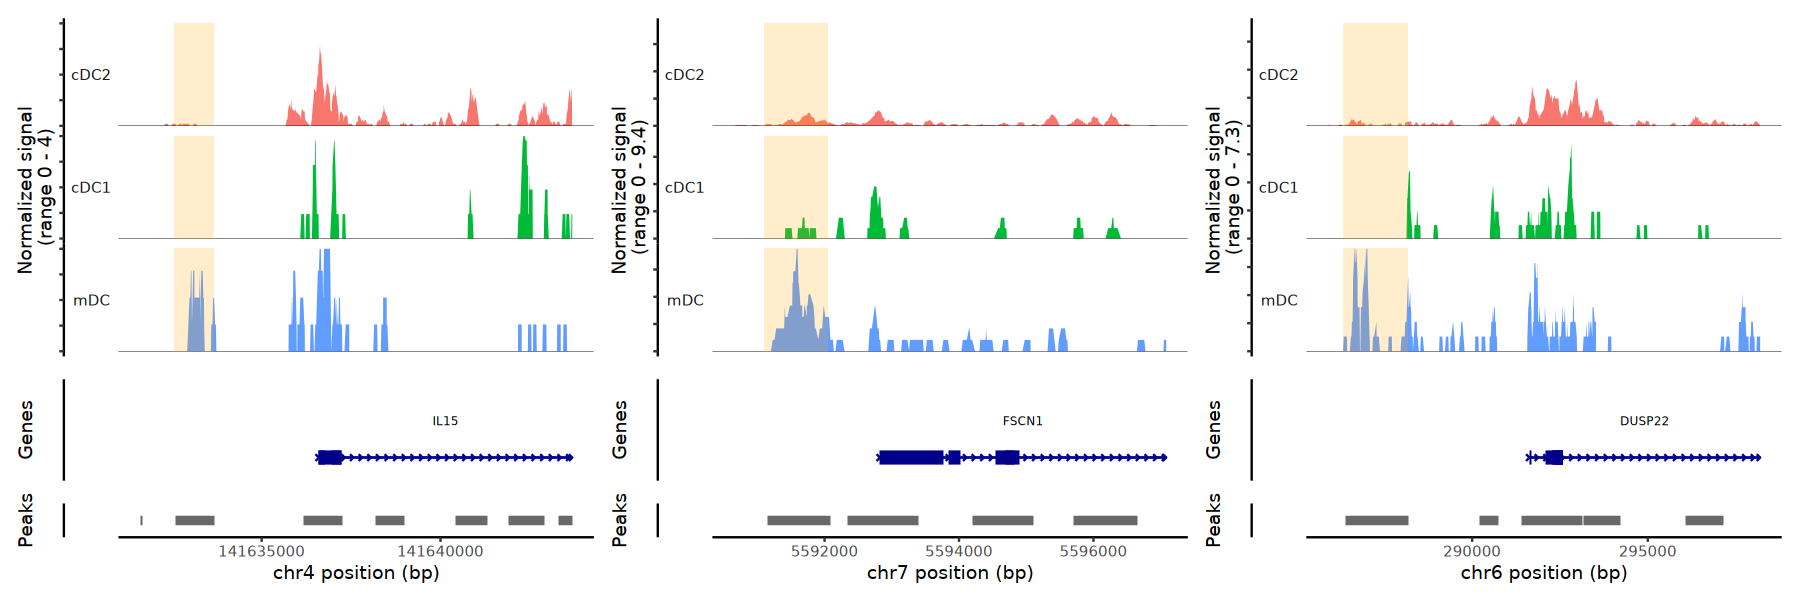

In [38]:
##FIGURE 5D
options(repr.plot.width = 15, repr.plot.height = 5)
IL15 + FSCN1 + DUSP22

Warning message:
“Removed 163 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


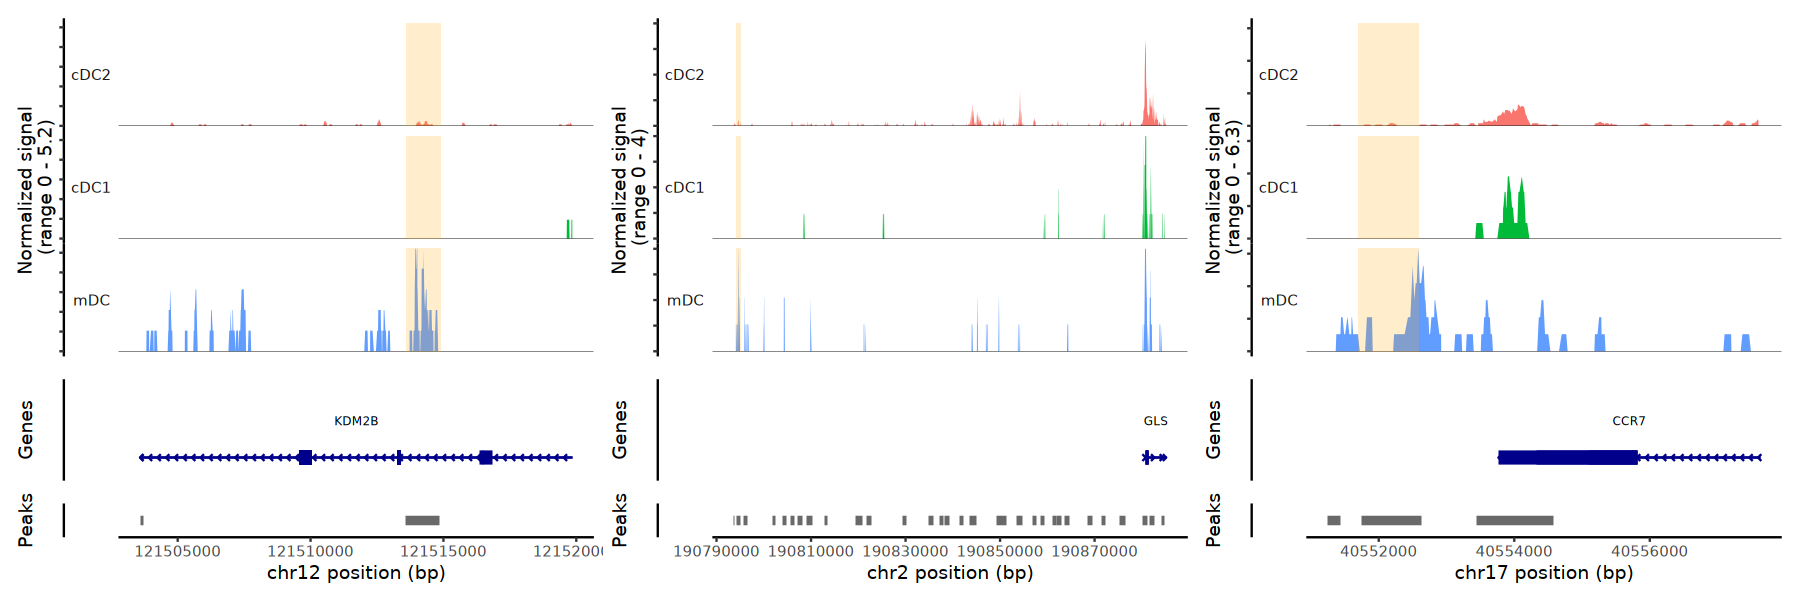

In [39]:
##EXTENDED FIGURE 5C
options(repr.plot.width = 15, repr.plot.height = 5)
KDM2B + GLS + CCR7

In [40]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.1.4        Signac_1.12.0      SeuratObject_5.0.1 Seurat_4.3.0.1    
[5] ggplot2_3.5.0     

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_2.0-4          
  [4] ggridges_0.5.6         IRdisplay_1.1          XVecto